# Hue, saturation and value manipulations

This code provides functions and examples on how to modify various color properties of images, including hue, saturation and brightness.  

First, let's import the required functions and libraries that we are going to use in the code. 

In [1]:
import os

import numpy as np 
import cv2

from HSV_manipulations import get_HSV_RGB, rotate_hue, change_saturation, change_brightness, plot_colorwheel    
from utils import print_image, imshow

We define the path of the image to modify and the path of the directory where we will save the results.

In [2]:
img_dir = "images/" # Image directory
# img_file = "adnan-coker_unknown-title(3).jpg" # Image file to modify
# img_file = "ad-reinhardt_yellow-painting-1949.jpg"
img_file = "nicholas-roerich_tent-mountain-1933.jpg"
results_dir = "results/image_recoloring/examples/" # Where to save the altered images
os.makedirs(results_dir, exist_ok=True) # Creates results_dir if it does not exist

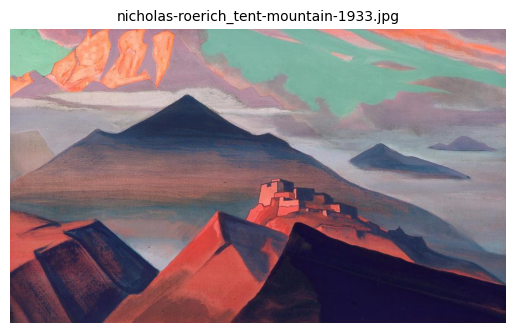

In [3]:
""" Here we read and plot the original image that we wish to modify."""
bgr_img = cv2.imread(img_dir + img_file) # cv2 encodes images in BGR
rgb_img = bgr_img[:, :, ::-1] # Converts BGR to RGB
imshow(rgb_img, img_file)

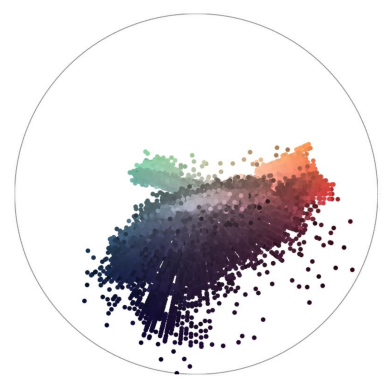

In [4]:
""" Here we plot its pixel distribution on the color wheel."""
hsv_img, rgb_img = get_HSV_RGB(img_dir + img_file, scale_factor=1)

# Downsample pixels for efficiency
downsampling_factor = 10
hsv_downsampled = hsv_img.transpose(2, 0, 1).reshape((3, -1)).transpose(1, 0)[::downsampling_factor]

# Define the colors on the color wheel
colors = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR).reshape(-1, 3)[::downsampling_factor][:, ::-1]

theta = hsv_downsampled[:, 0].astype('float16') * 2 * np.pi / 180.0  # Convert hue to radians
r = hsv_downsampled[:, 1]  # Saturation as radius
x_coordinates = r * np.cos(theta)
y_coordinates = r * np.sin(theta)

plot_colorwheel(x_coordinates, y_coordinates, colors, path=results_dir + "colorwheel.jpg")

colorwheel = cv2.imread(results_dir + "colorwheel.jpg")[:, :, ::-1]
imshow(colorwheel)

### Hue alteration
Let's modify the hue of the image by rotating all pixels across the colorwheel by a certain degree. The resulting image will be saved in "result_dir".

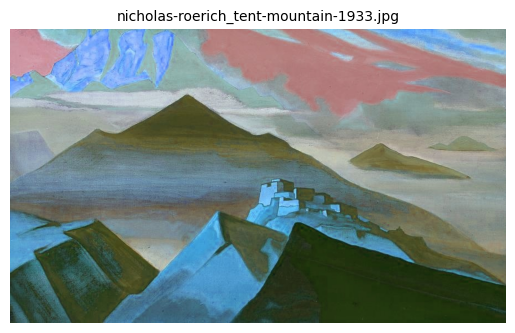

In [5]:
# Modify image:
degrees = 200
os.makedirs(results_dir + "hue/", exist_ok=True)
rotate_hue(hsv_img.copy(), degrees, 1, img_file, results_dir + "hue/")

# Visualize the result:
new_img = cv2.imread(results_dir + "hue/" + img_file.replace(".jpg", f"_{degrees}degrees.jpg"))[:, :, ::-1]
imshow(new_img, img_file)

### Saturation alteration 
Here we alter the saturation of the colors by adding delta. Delta can be positive or negative. Note that the saturation values range from 0 (low saturation) to 255 (high saturation). 

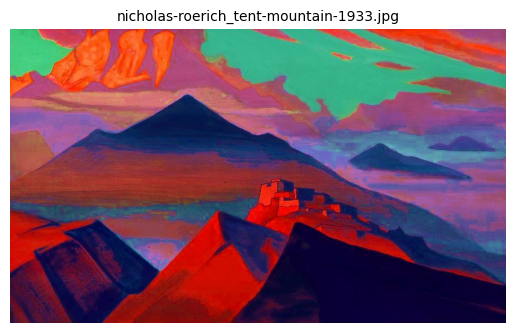

In [6]:
# Modify the image 
delta = +100
os.makedirs(results_dir + "saturation/", exist_ok=True)
change_saturation(hsv_img.copy(), delta, 10, img_file, results_dir + "saturation/")

# Visualize the result:
new_img = cv2.imread(results_dir + "saturation/" + img_file.replace(".jpg", f"_{delta}saturation.jpg"))[:, :, ::-1]
imshow(new_img, img_file)

### Brightness alteration 
Here we alter the brightness of the colors by adding delta. Delta can be positive or negative. Note that the brightness values range from 0 (dark) to 255 (light). 

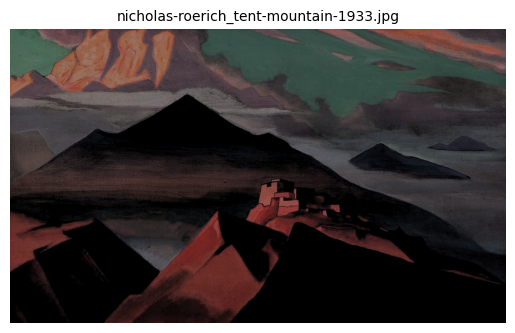

In [7]:
# Modify the image 
delta = -100
os.makedirs(results_dir + "brightness/", exist_ok=True)
change_brightness(hsv_img.copy(), delta, 10, img_file, results_dir + "brightness/")

# Visualize the result:
new_img = cv2.imread(results_dir + "brightness/" + img_file.replace(".jpg", f"_{delta}brightness.jpg"))[:, :, ::-1]
imshow(new_img, img_file)